<h1><center><b>Lab 4: Simple Linear Regression</b></center></h1>

In [1]:
#Import Packages
import pandas as pd
import numpy as np
from sklearn.preprocessing import OneHotEncoder
import seaborn as sns
import matplotlib.pyplot as plt
from numpy import random
import statsmodels.api as sma
import statsmodels as sm
import pylab as py
import scipy.stats as stats
import scipy as sp
import statsmodels.formula.api as smf
import sklearn
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.metrics import mean_squared_error
from plotnine import *
from scipy.stats import skew
import statsmodels.stats.multicomp as mc

In [2]:
#Load Data

cars2010 = pd.read_csv("https://raw.githubusercontent.com/IAA-Faculty/statistical_foundations/refs/heads/master/cars2010.csv")

We will use the cars2010 data to explore the relationship between the Fuel Economy (FE) and various predictors in the dataset using data exploration techniques, then simple linear regression. We will use EngDispl, NumCyl, ExhaustValvesPerCyl, and VarValveTiming as the predictors that we will explore for the following questions.

Create scatter plots of the 4 predictors by FE. Can it be reasonably said that each of the variables all have a linear relationship with FE?

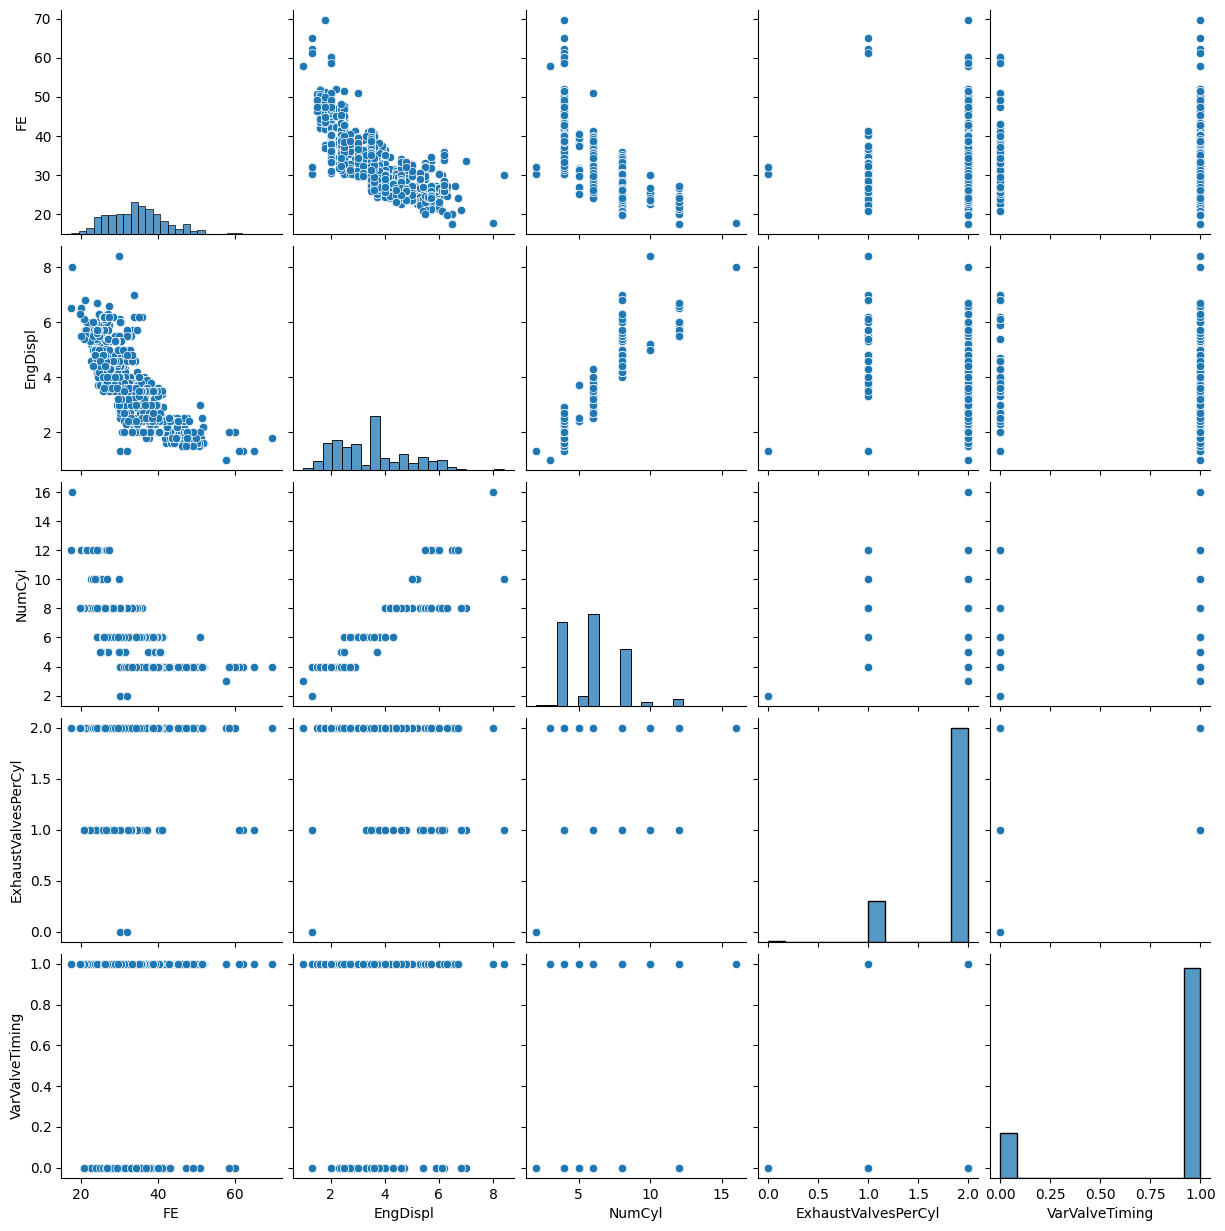

In [5]:
cars_plot = cars2010[['FE','EngDispl', 'NumCyl', 'ExhaustValvesPerCyl', 'VarValveTiming']]
sns.pairplot(cars_plot)

What is the correlation between FE and EngDispl? (Round to 3 decimal places)

np.corrcoef(cars_plot, rowvar=False)

Is the p-value for the correlation between FE and EnglDispl statistically significant?

In [7]:
sp.stats.pearsonr(cars2010['FE'], cars2010['EngDispl'])

PearsonRResult(statistic=-0.7873938257311006, pvalue=2.0945376796345218e-234)

Fit a simple linear regression model with FE as the response and EngDispl as the predictor

In [9]:
model_slr = smf.ols("FE ~ EngDispl", data = cars2010).fit()
model_slr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     FE   R-squared:                       0.620
Model:                            OLS   Adj. R-squared:                  0.620
Method:                 Least Squares   F-statistic:                     1803.
Date:                Mon, 07 Jul 2025   Prob (F-statistic):          2.09e-234
Time:                        22:56:05   Log-Likelihood:                -3264.9
No. Observations:                1107   AIC:                             6534.
Df Residuals:                    1105   BIC:                             6544.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     50.5632      0.398    126.890      0.000      49.781      51.345
EngDispl      -4.5209      0.106    -42.460      0.000      -4.730      -4.312
==============================================================================
Omnibus:                      194.978   Durbin-Watson:                   0.892
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              488.783
Skew:                           0.939   Prob(JB):                    7.28e-107
Kurtosis:                       5.659   Cond. No.                         11.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

The IceCream dataset has two columns: sales, which gives the total daily sales of a local ice cream shop in hundreds of dollars, and temperature, which reflects the daily high temperature. Use this information to answer the following questions:

In [17]:
#Load Data

ice_cream = pd.read_csv("https://raw.githubusercontent.com/IAA-Faculty/statistical_foundations/refs/heads/master/icecream.csv")

In [18]:
ice_cream = ice_cream.dropna()

Is the relationship between sales and temperature reasonably linear?

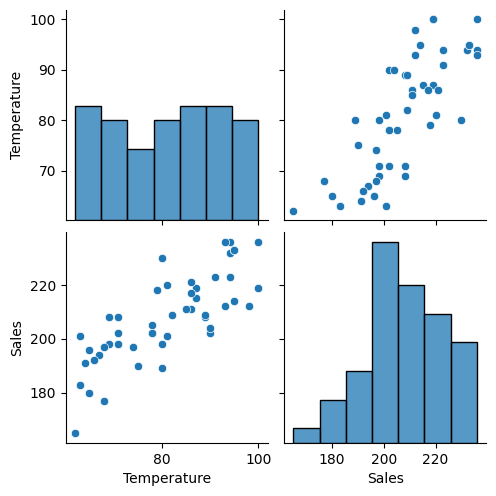

In [19]:
ice_cream_plot = ice_cream[['Temperature', 'Sales']]
sns.pairplot(ice_cream_plot)

What is the correlation coefficient of Sales vs Temperature? (round to 4 decimals)

In [20]:
np.corrcoef(ice_cream['Sales'], ice_cream['Temperature'])

array([[1.        , 0.78454656],
       [0.78454656, 1.        ]])

Is the correlation statistically significant?

In [22]:
sp.stats.pearsonr(ice_cream['Sales'], ice_cream['Temperature'])

PearsonRResult(statistic=0.7845465560588074, pvalue=1.5715134806741045e-11)

Run an SLR predicting daily sales from temperature

In [23]:
model_slr = smf.ols("Sales ~ Temperature", data = ice_cream).fit()
model_slr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.616
Model:                            OLS   Adj. R-squared:                  0.608
Method:                 Least Squares   F-statistic:                     76.84
Date:                Mon, 07 Jul 2025   Prob (F-statistic):           1.57e-11
Time:                        23:31:01   Log-Likelihood:                -185.49
No. Observations:                  50   AIC:                             375.0
Df Residuals:                      48   BIC:                             378.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept     119.2974     10.210     11.684      0.000      98.769     139.826
Temperature     1.0901      0.124      8.766      0.000       0.840       1.340
==============================================================================
Omnibus:                        0.592   Durbin-Watson:                   2.145
Prob(Omnibus):                  0.744   Jarque-Bera (JB):                0.675
Skew:                          -0.046   Prob(JB):                        0.713
Kurtosis:                       2.438   Cond. No.                         588.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [24]:
ice_cream['pred_slr'] = model_slr.predict()
ice_cream['resid_slr'] = model_slr.resid

Are the errors normally distributed?



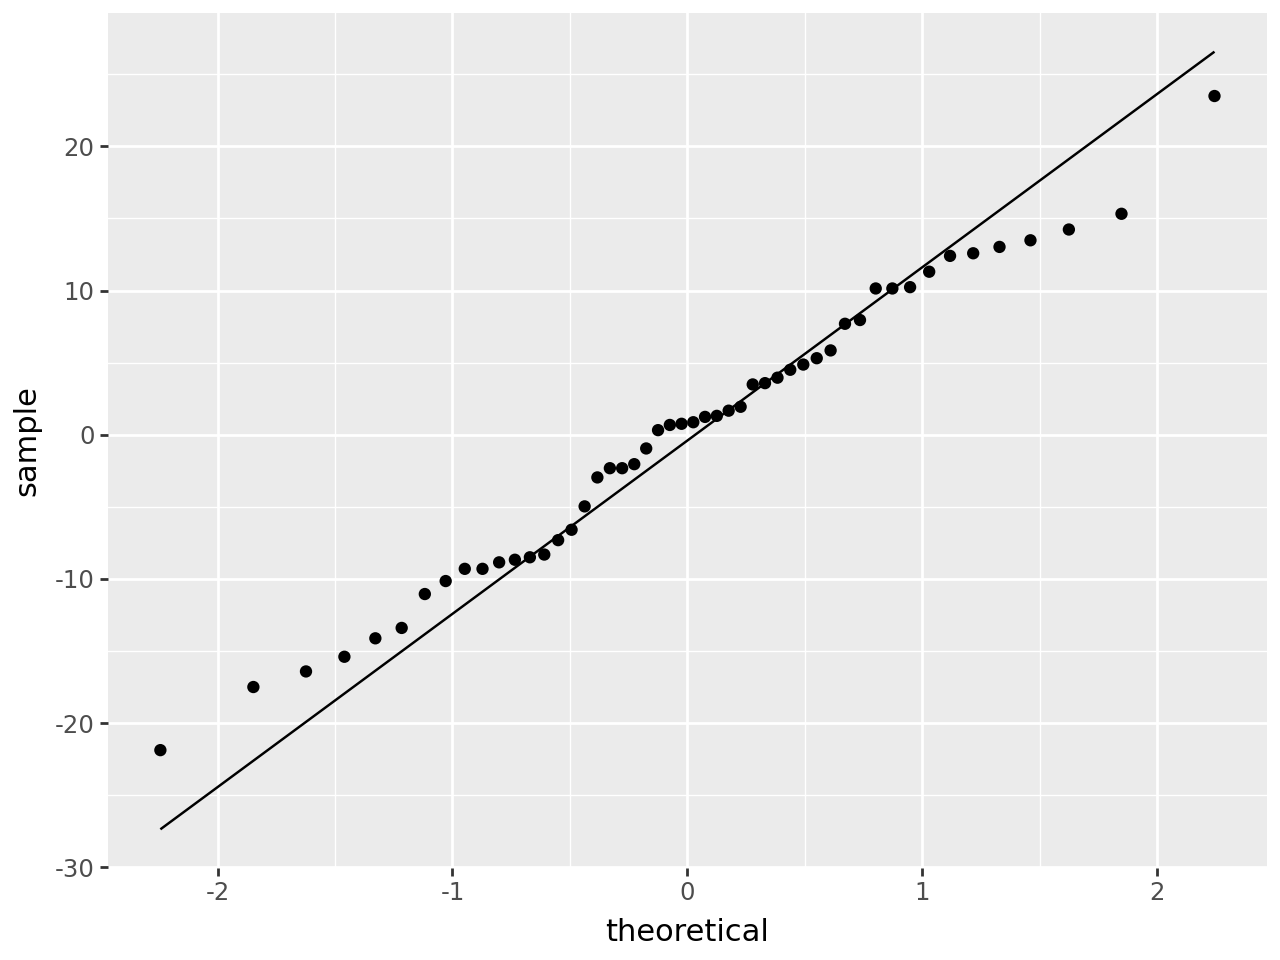

In [25]:
p = (
ggplot(ice_cream, aes(sample = "resid_slr")) +
stat_qq() +
stat_qq_line() )
p.show()

Is the constant variance of the errors assumption satisfied?

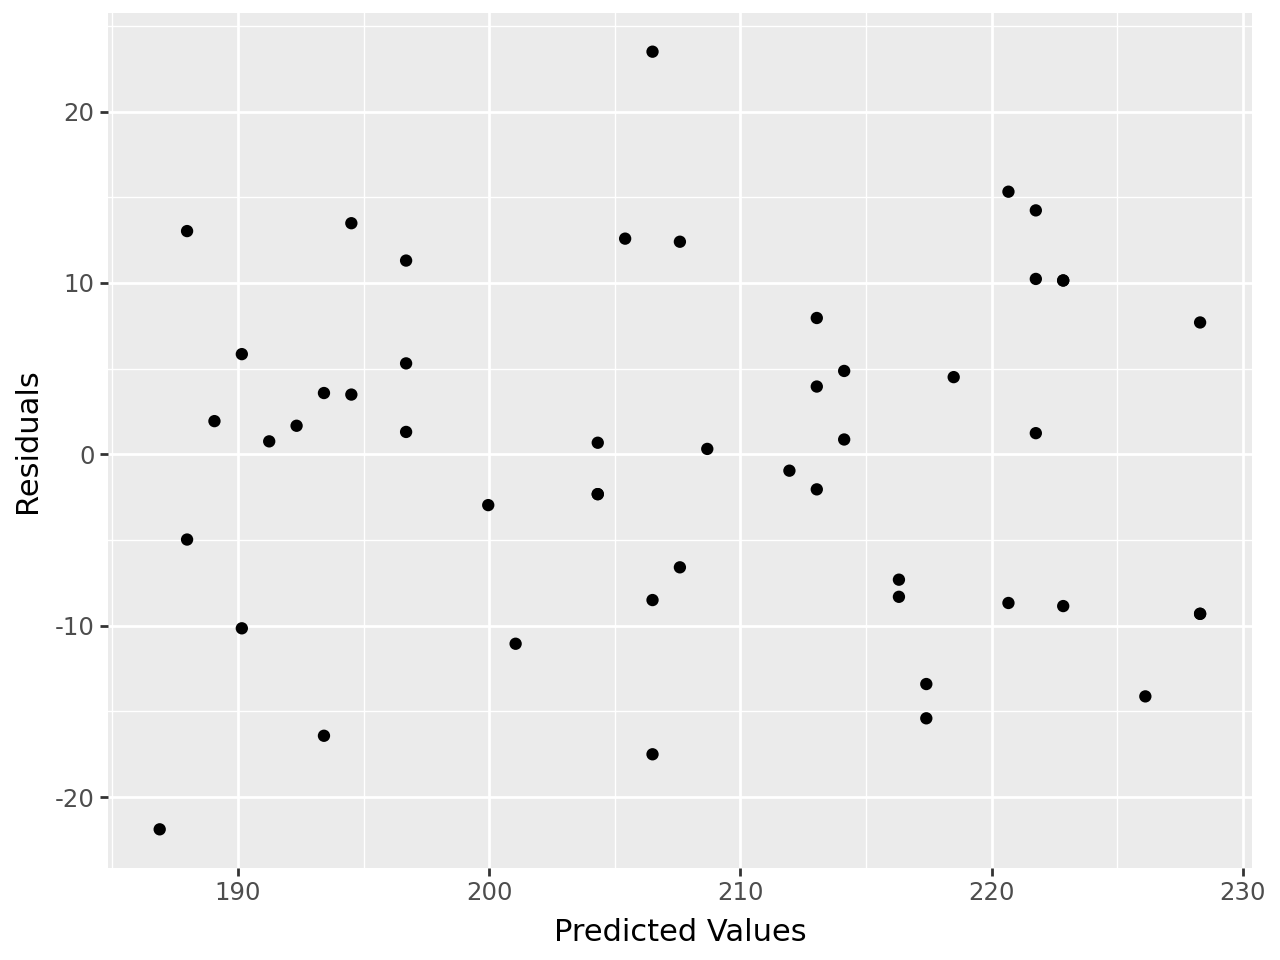

In [26]:
p = (
  ggplot(ice_cream, aes(x='pred_slr',y='resid_slr'))+ geom_point()+ labs(x='Predicted Values',y='Residuals')
  )
  
p.show()